In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
str(pd.__version__)

'2.2.0'

In [58]:
df=pd.read_csv('mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [59]:
df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [60]:
df.describe().agg(['mean'])

,displ,year,cyl,cty,hwy
mean,32.207969,1532.438706,33.937553,43.639365,48.549352


In [61]:
df.describe().agg(['mean','max','min'])

,displ,year,cyl,cty,hwy
mean,32.207969,1532.438706,33.937553,43.639365,48.549352
max,234.000000,2008.000000,234.000000,234.000000,234.000000
min,1.291959,4.509646,1.611534,4.255946,5.954643


In [62]:
df.describe().agg(['mean','max','min']).T

,mean,max,min
displ,32.207969,234.0,1.291959
year,1532.438706,2008.0,4.509646
cyl,33.937553,234.0,1.611534
cty,43.639365,234.0,4.255946
hwy,48.549352,234.0,5.954643


In [63]:
df.cty.mean()

16.858974358974358

In [64]:
df.cty.describe().agg(['mean','max'])

mean     43.639365
max     234.000000
Name: cty, dtype: float64

In [65]:
df.groupby(['class','year'])[['cty','hwy']].mean()

cty        hwy
class      year                      
2seater    1999  15.500000  24.500000
           2008  15.333333  25.000000
compact    1999  19.760000  27.920000
           2008  20.545455  28.727273
midsize    1999  18.150000  26.500000
           2008  19.333333  28.047619
minivan    1999  16.166667  22.500000
           2008  15.400000  22.200000
pickup     1999  13.000000  16.812500
           2008  13.000000  16.941176
subcompact 1999  21.578947  29.000000
           2008  18.937500  27.125000
suv        1999  13.379310  17.551724
           2008  13.606061  18.636364

In [66]:
df.groupby(['class','year'])[['cty','hwy']].agg(['mean','max'])

cty            hwy    
                      mean max       mean max
class      year                              
2seater    1999  15.500000  16  24.500000  26
           2008  15.333333  16  25.000000  26
compact    1999  19.760000  33  27.920000  44
           2008  20.545455  28  28.727273  37
midsize    1999  18.150000  21  26.500000  29
           2008  19.333333  23  28.047619  32
minivan    1999  16.166667  18  22.500000  24
           2008  15.400000  17  22.200000  24
pickup     1999  13.000000  16  16.812500  20
           2008  13.000000  17  16.941176  22
subcompact 1999  21.578947  35  29.000000  44
           2008  18.937500  26  27.125000  36
suv        1999  13.379310  18  17.551724  25
           2008  13.606061  20  18.636364  27

In [67]:
df.groupby(['class'])[['cty','hwy']].agg(['min','max'])

cty     hwy    
           min max min max
class                     
2seater     15  16  23  26
compact     15  33  23  44
midsize     15  23  23  32
minivan     11  18  17  24
pickup       9  17  12  22
subcompact  14  35  20  44
suv          9  20  12  27

In [68]:
df.groupby('class').cty.mean()

class
2seater       15.400000
compact       20.127660
midsize       18.756098
minivan       15.818182
pickup        13.000000
subcompact    20.371429
suv           13.500000
Name: cty, dtype: float64

<Axes: ylabel='class'>

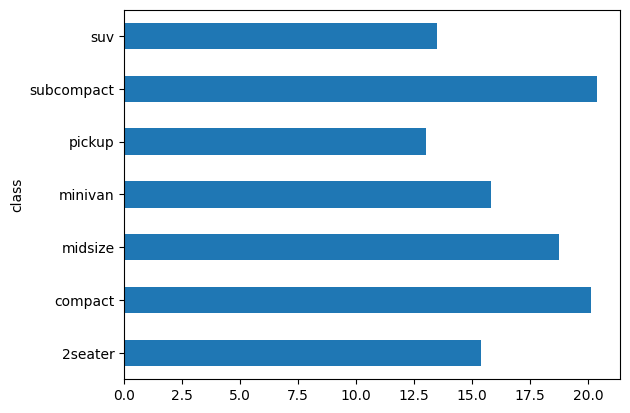

In [69]:
df.groupby('class').cty.mean().plot(kind='barh')

<Axes: ylabel='class'>

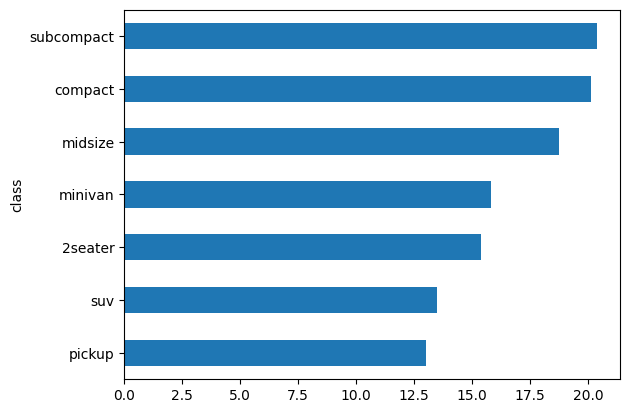

In [72]:
df.groupby('class').cty.mean().sort_values().plot(kind='barh')

In [77]:
avg = df.groupby('class').cty.mean().mean()
print(avg)

16.710481075007728


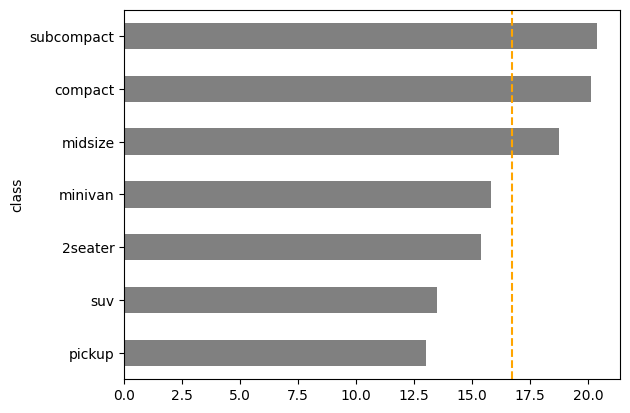

In [83]:
df.groupby('class').cty.mean().sort_values().plot(kind='barh', color='grey')
plt.axvline(x=avg, linestyle='--', color='orange')